# Bike-sharing assignment

### Step 1: Reading and Understanding the Data
Let us first import key libraries and read the dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
boombikes = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the dataframe

In [5]:
# To check number of rows and columns

boombikes.shape

(730, 16)

In [6]:
# To check information about each column

boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# To cross check if there are any null values in the dataset

boombikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

From above two tables we can see that the dataset doesnt have any null values

In [8]:
# To check the details of numerical columns and check if the datapoints are within the expected range

boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


From above two tables, we can observe that there are columns which are categorical but has numerical values. I am converting those to categorical

In [9]:
boombikes[['season']] = boombikes[['season']].apply(lambda x: x.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}))
boombikes[['mnth']] = boombikes[['mnth']].apply(lambda x: x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}))
boombikes[['weekday']] = boombikes[['weekday']].apply(lambda x: x.map({1:'Monday', 2:'Tues', 3:'Wedn', 4:'Thurs', 5:'Friday', 6:'Satrd', 0:'Sunday'}))
boombikes[['weathersit']] = boombikes[['weathersit']].apply(lambda x: x.map({1:'Clear', 2:'Mist_Cloudy', 3:'LightSnow_LightRain', 4:'Snow_HeavyRain'}))

There are following columns which are not required in the analysis and can be dropped,
- instant: It has unique values of record index and hence can be dropped as no meaningful info will be derived
- dteday: dteday is not required as we already have day weekday, mnth and yr columns
- casual & registered: Sum of these to columns is our target variable and will always be linear correlated and hence can be dropped

In [10]:
# Drop the following columns due to insignificance in the dataset

boombikes.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)

In [11]:
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tues,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wedn,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Step 2: Visualising the Data
Let's understand and visualize the data using matplotlib and seaborn

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Visualising Numeric Variables
Using pairplot for all the numeric variables

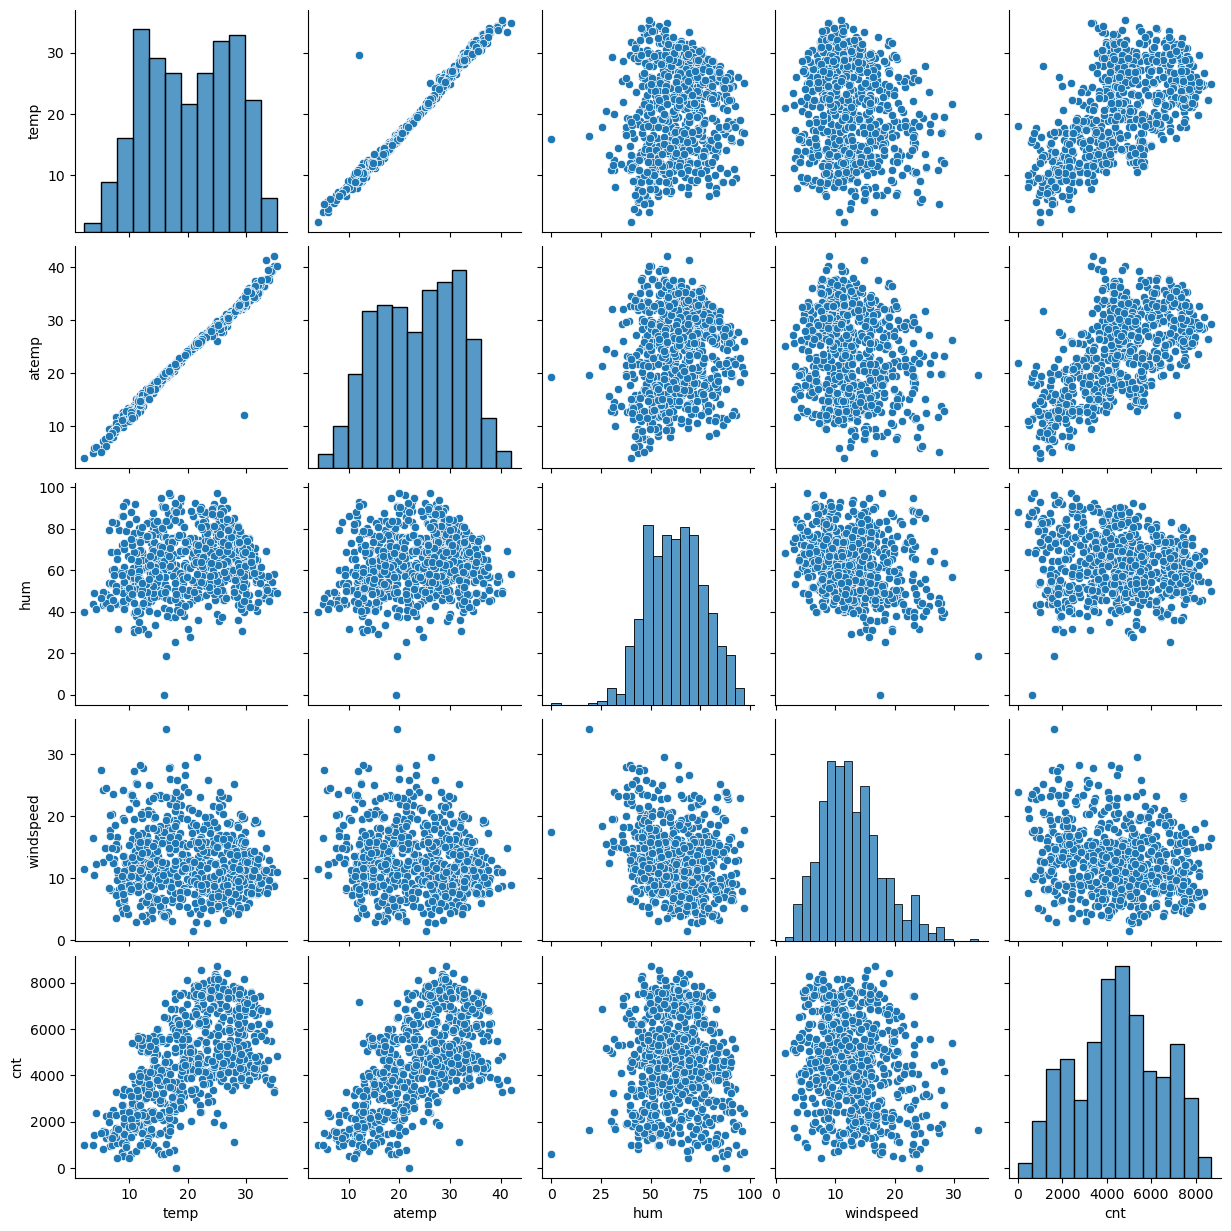

In [13]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

sns.pairplot(boombikes[num_vars])
plt.show()

##### Visualising Categorical Variables
Let's make a boxplot for some of the categorical variables as well

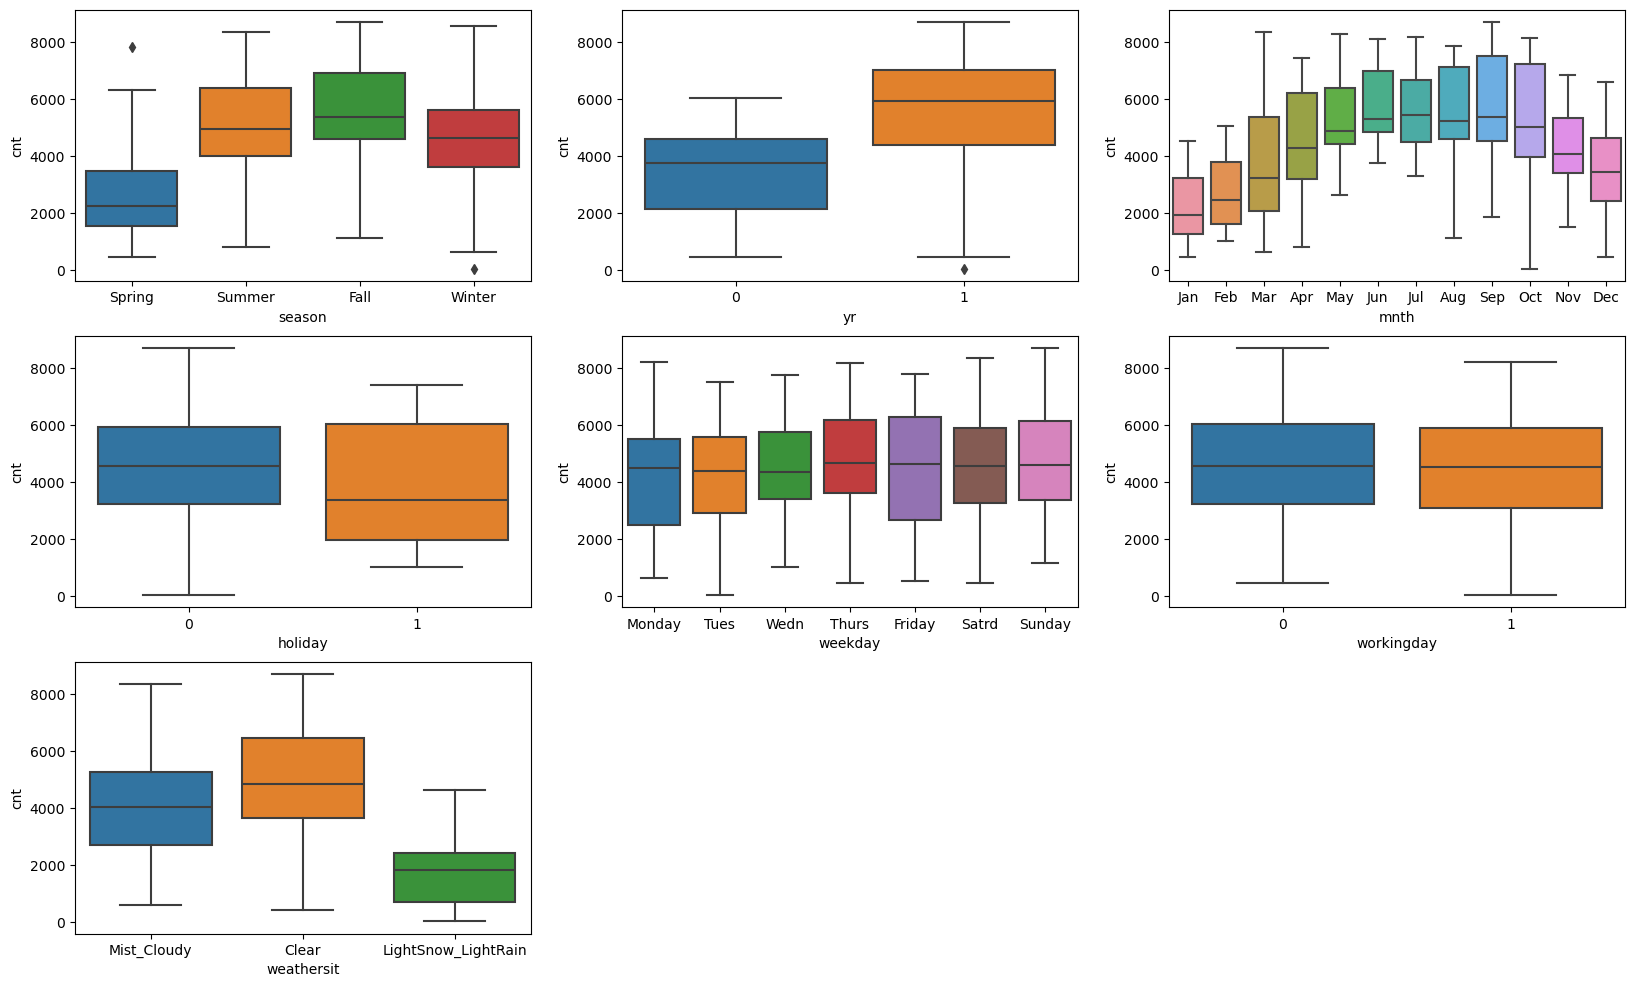

In [14]:
plt.figure(figsize=(20, 12))

plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = boombikes)

plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = boombikes)

plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = boombikes)

plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = boombikes)

plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = boombikes)

plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = boombikes)

plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boombikes)
plt.show()

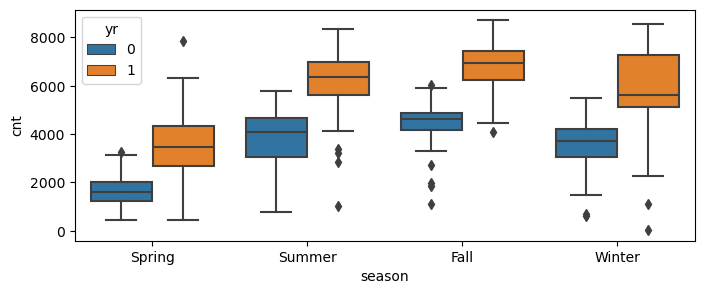

In [15]:
# Lets visualize how the target variable behaves wrt seasons, year on year

plt.figure(figsize = (8, 3))
sns.boxplot(x = 'season', y = 'cnt', hue = 'yr', data = boombikes)
plt.show()

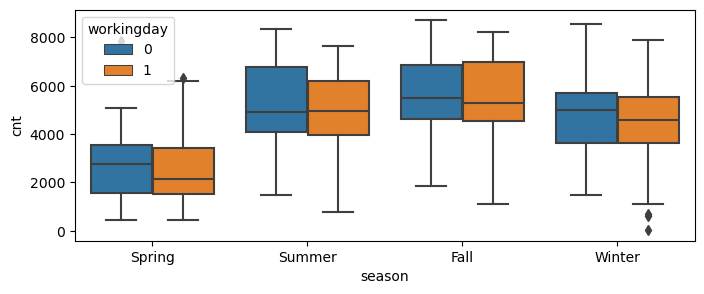

In [16]:
# Lets visualize how the target variable behaves wrt seasons on working days

plt.figure(figsize = (8, 3))
sns.boxplot(x = 'season', y = 'cnt', hue = 'workingday', data = boombikes)
plt.show()

<Axes: >

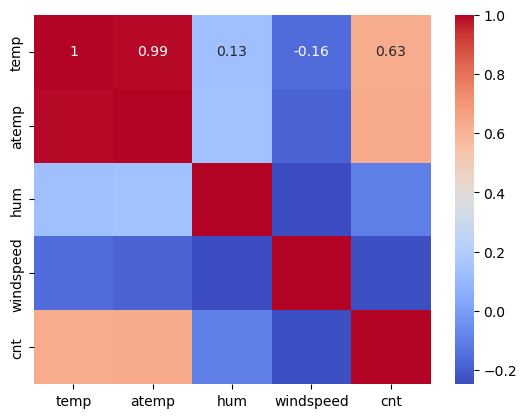

In [17]:
# To visualize the correlation among numerical variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

sns.heatmap(boombikes[num_vars].corr(), annot=True, cmap='coolwarm')

Key observatons from the visualization charts:
1. temp and atemp has some kind of linear relation with the target variable and temp and atemp are are highly linearly correlated
2. Highest number of target variable are in
   - Fall season and takes a dip in spring
   - There is year wise increase in demand from 2018 to 2019
   - Demand peaks in Jun, Jul, Aug and Sep and then declines
   - Demand is highest during Clear weather and it drops as weather situation deteriorate
3. There is not much difference of demand during any day of a week or if it is a working day or not

# Step-3: Dummy Variables
The variables has multiple levels. We need to convert these levels into integer as well.

In [18]:
season_dummy = pd.get_dummies(boombikes['season'],  drop_first=True, dtype=int)
mnth_dummy = pd.get_dummies(boombikes['mnth'], drop_first=True, dtype=int)
weekday_dummy = pd.get_dummies(boombikes['weekday'], drop_first=True, dtype=int)
weathersit_dummy = pd.get_dummies(boombikes['weathersit'], drop_first=True, dtype=int)

In [19]:
# Adding these newly created dummy columns with our dataset

boombikes = pd.concat([boombikes, season_dummy, mnth_dummy, weekday_dummy, weathersit_dummy], axis = 1)

In [20]:
# To display all the columns of the dataset

pd.set_option('display.max_columns', None)

In [21]:
# Dropping the columns for which dummies are created

boombikes.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [22]:
boombikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Satrd,Sunday,Thurs,Tues,Wedn,LightSnow_LightRain,Mist_Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
# Lets see the information about each column after making the changes required for the analysis

boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   Spring               730 non-null    int32  
 9   Summer               730 non-null    int32  
 10  Winter               730 non-null    int32  
 11  Aug                  730 non-null    int32  
 12  Dec                  730 non-null    int32  
 13  Feb                  730 non-null    int32  
 14  Jan                  730 non-null    int32  
 15  Jul                  730 non-null    int

All the columns are Int/Float type, suitable for our analysis

# Step 4: Splitting the Data into Training and Testing Sets

In [24]:
# Spliting the entire data into Train (70%) and Test (30%) sets

from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(boombikes, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

I will use Min-Max scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
# Apply scaler() to all the columns except 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [28]:
df_train.shape

(510, 30)

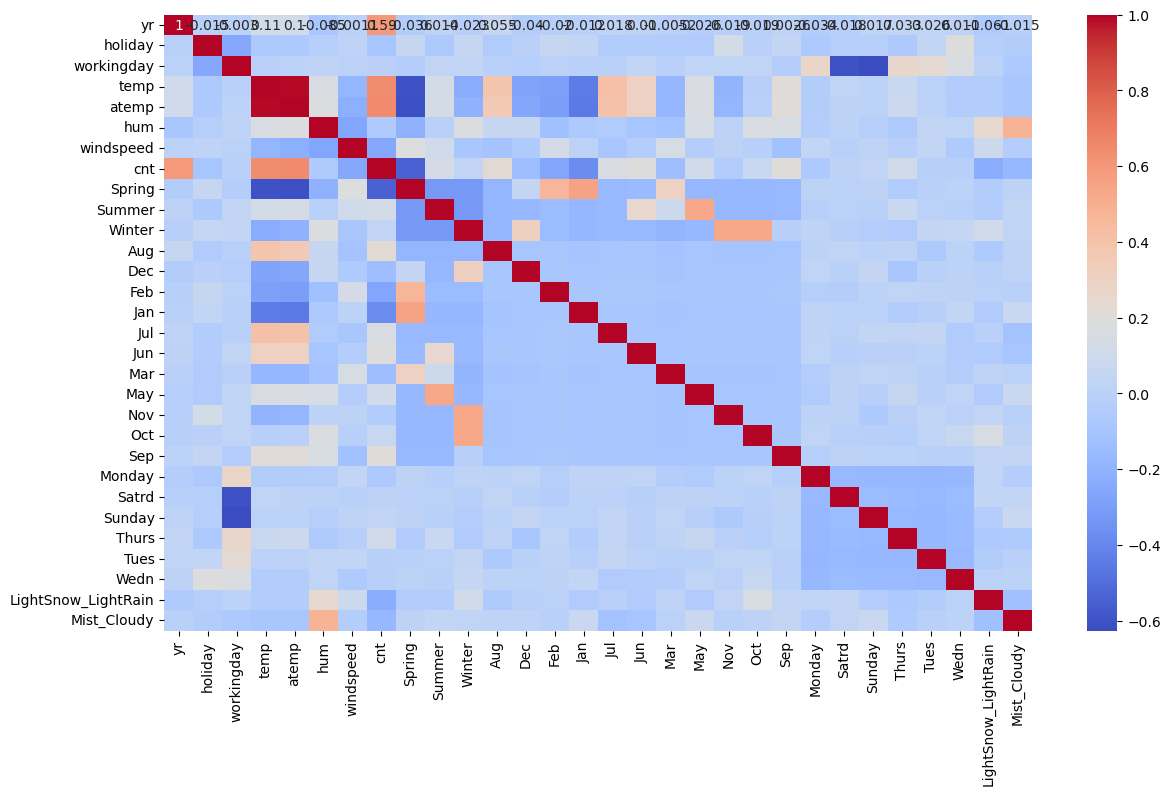

In [29]:
# To visualize the correlation between all the columns

plt.figure(figsize = (14, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.show()

In [30]:
# Correlation table

df_train.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Satrd,Sunday,Thurs,Tues,Wedn,LightSnow_LightRain,Mist_Cloudy
yr,1.000000,-0.014980,-0.003005,0.107288,0.104206,-0.084792,-0.001108,0.591508,-0.036320,0.013856,-0.022638,0.054774,-0.040049,-1.991603e-02,-0.011794,0.017623,0.010484,-0.005172,-0.025933,-0.018790,-0.018790,0.002574,-0.033817,-0.017733,0.016537,0.032785,0.026024,0.010995,-6.076399e-02,-0.015469
holiday,-0.014980,1.000000,-0.254149,-0.066282,-0.070640,-0.029093,0.017569,-0.095961,0.053339,-0.063232,0.050712,-0.052728,-0.004302,5.652428e-02,0.037412,-0.046539,-0.045890,-0.053321,-0.049076,0.127543,-0.005387,0.043692,-0.069242,-0.025291,-0.028355,-0.066102,0.034971,0.190636,-2.815377e-02,-0.038279
workingday,-0.003005,-0.254149,1.000000,-0.007643,0.003814,0.020701,-0.002504,-0.008723,-0.032886,0.030488,0.036097,-0.012875,-0.025020,-3.470925e-03,-0.015711,-0.012361,0.032195,-0.008563,0.021720,0.025939,0.025939,-0.034746,0.272446,-0.605864,-0.626783,0.260091,0.234321,0.163120,8.289412e-03,-0.068924
temp,0.107288,-0.066282,-0.007643,1.000000,0.989537,0.155415,-0.187396,0.643517,-0.605988,0.125582,-0.233697,0.387456,-0.272869,-2.960214e-01,-0.446724,0.413929,0.302997,-0.179694,0.155415,-0.194765,-0.018709,0.207457,-0.037708,0.025276,0.006854,0.074973,-0.001951,-0.046291,-3.609266e-02,-0.090161
atemp,0.104206,-0.070640,0.003814,0.989537,1.000000,0.169461,-0.215283,0.646475,-0.610741,0.135806,-0.211118,0.360025,-0.261862,-2.995091e-01,-0.450832,0.407105,0.295173,-0.178458,0.161923,-0.185697,-0.005262,0.206157,-0.036829,0.012090,0.006359,0.078627,0.002815,-0.043377,-4.426553e-02,-0.086069
hum,-0.084792,-0.029093,0.020701,0.155415,0.169461,1.000000,-0.266895,-0.059993,-0.201134,-0.013216,0.171579,0.053185,0.057832,-1.295442e-01,-0.071652,-0.053838,-0.095033,-0.110761,0.145604,0.004910,0.162014,0.152628,-0.030499,0.002783,-0.027388,-0.056997,0.033548,0.026395,2.450381e-01,0.481042
windspeed,-0.001108,0.017569,-0.002504,-0.187396,-0.215283,-0.266895,1.000000,-0.253794,0.180743,0.110089,-0.090649,-0.111243,-0.060975,1.331228e-01,0.006793,-0.085478,-0.035012,0.142173,-0.034137,0.009952,-0.018973,-0.121734,0.035390,-0.016284,0.018278,-0.021502,0.035616,-0.057518,8.689990e-02,-0.030385
cnt,0.591508,-0.095961,-0.008723,0.643517,0.646475,-0.059993,-0.253794,1.000000,-0.548871,0.134343,0.032636,0.227229,-0.143598,-2.702870e-01,-0.378173,0.157812,0.187821,-0.137537,0.113027,-0.048130,0.065692,0.201327,-0.071188,0.012496,0.031237,0.110430,-0.018885,-0.019578,-2.265984e-01,-0.175530
Spring,-0.036320,0.053339,-0.032886,-0.605988,-0.610741,-0.201134,0.180743,-0.548871,1.000000,-0.322955,-0.326377,-0.184784,0.041868,4.715403e-01,0.548861,-0.163094,-0.160819,0.305009,-0.171986,-0.174161,-0.174161,-0.167580,0.010007,-0.000641,0.013022,-0.048931,-0.012251,0.002987,-4.455809e-02,0.013970
Summer,0.013856,-0.063232,0.030488,0.125582,0.135806,-0.013216,0.110089,0.134343,-0.322955,1.000000,-0.328116,-0.185769,-0.172902,-1.522862e-01,-0.177257,-0.163963,0.254937,0.088068,0.532539,-0.175089,-0.175089,-0.168473,-0.017169,-0.002397,-0.015325,0.066484,-0.001490,-0.012151,-4.523062e-02,0.039442


# Step 5: Preparing the model

We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (Recursive feature elimination)

In [31]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
y_train = df_train.pop('cnt')
X_train = df_train

In [33]:
X_train.shape

(510, 29)

In [34]:
# Since there are 29 independent variables which are practically not possible to run manually
# I am running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Monday', False, 9),
 ('Satrd', False, 4),
 ('Sunday', False, 5),
 ('Thurs', False, 13),
 ('Tues', False, 8),
 ('Wedn', False, 11),
 ('LightSnow_LightRain', True, 1),
 ('Mist_Cloudy', True, 1)]

In [36]:
# Printing 15 columns which are returned by RFE

rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'LightSnow_LightRain',
       'Mist_Cloudy'],
      dtype='object')

In [37]:
# Printing the columns which are not supported by RFE

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct',
       'Monday', 'Satrd', 'Sunday', 'Thurs', 'Tues', 'Wedn'],
      dtype='object')

# Step 6: Building model using statsmodel, for the detailed statistics

### Model-1

In [38]:
# Creating X_train dataframe with RFE supported 15 variables

X_train_rfe1 = X_train[rfe_col]

In [39]:
# Adding a constant variable 
import statsmodels.api as sm  

X_train_lm1 = sm.add_constant(X_train_rfe1)

In [40]:
# Running the linear model

lm1 = sm.OLS(y_train,X_train_lm1).fit()

In [41]:
# Let's see the summary of our linear model-1

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          3.34e-189
Time:                        20:55:32   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3202    

In [42]:
# Since p-values of all the variables is less than 0.05, I will check the VIF values

In [43]:
# Calculate the VIFs for model-1

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,Spring,4.37
7,Winter,4.06
6,Summer,2.81
14,Mist_Cloudy,2.32
0,yr,2.09
11,Nov,1.83
9,Jan,1.75


Observation of Model-1: All the P>|t| values of this model are within the acceptable range. However VIF values are more than the acceptable limits so we will drop 'hum' (highest VIF) and rebulid the model

In [44]:
X_train_rfe2 = X_train_rfe1.drop(["hum"], axis = 1)

### Model-2

In [45]:
# Building the model without 'hum'

# Adding a constant variable 
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Running the linear model
lm2 = sm.OLS(y_train,X_train_lm2).fit()

# Let's see the summary of our linear model-2
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          1.57e-186
Time:                        20:56:18   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2466    

In [46]:
# Since p-values of all the variables is less than 0.05, I will check the VIF values

In [47]:
# Calculate the VIFs for model-2

vif = pd.DataFrame()
X = X_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,Winter,2.94
4,Spring,2.89
5,Summer,2.23
0,yr,2.07
10,Nov,1.80
8,Jan,1.66
9,Jul,1.59
13,Mist_Cloudy,1.56


Observation of Model-2: All the P>|t| values of this model are within the acceptable range. However VIF values are more than the acceptable limits so we will drop 'temp' (highest VIF) and rebulid the model

In [48]:
X_train_rfe3 = X_train_rfe2.drop(["temp"], axis = 1)

### Model-3

In [49]:
# Building the model without 'temp'

# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_rfe3)

# Running the linear model
lm3 = sm.OLS(y_train,X_train_lm3).fit()

# Let's see the summary of our linear model-3
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          5.50e-160
Time:                        20:56:56   Log-Likelihood:                 439.69
No. Observations:                 510   AIC:                            -851.4
Df Residuals:                     496   BIC:                            -792.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5961    

Observation of Model-3: Jul has hightest insignificance (P>|t|>0.05) wrt the other variables; I will drop Jul and rebulid the model after checking the VIF values for reference

In [50]:
# Calculate the VIFs for model-3

vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.88
3,Spring,2.89
5,Winter,2.84
4,Summer,2.01
0,yr,1.83
9,Nov,1.79
7,Jan,1.64
12,Mist_Cloudy,1.52
6,Dec,1.45
8,Jul,1.20


In [51]:
# Dropping Jul

X_train_rfe4 = X_train_rfe3.drop(["Jul"], axis = 1)

### Model-4

In [52]:
# Building the model without 'Jul'

# Adding a constant variable 
X_train_lm4 = sm.add_constant(X_train_rfe4)

# Running the linear model
lm4 = sm.OLS(y_train,X_train_lm4).fit()

# Let's see the summary of our linear model-4
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     158.0
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          6.36e-161
Time:                        20:57:24   Log-Likelihood:                 439.28
No. Observations:                 510   AIC:                            -852.6
Df Residuals:                     497   BIC:                            -797.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5892    

Observation of Model-4: Winter has hightest insignificance (P>|t|>0.05) wrt the other variables; I will drop Winter and rebulid the model after checking the VIF values for reference

In [53]:
# Calculate the VIFs for model-4

vif = pd.DataFrame()
X = X_train_rfe4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.52
5,Winter,2.74
3,Spring,2.71
4,Summer,1.86
8,Nov,1.79
0,yr,1.77
7,Jan,1.64
11,Mist_Cloudy,1.52
6,Dec,1.45
9,Sep,1.16


In [54]:
# Dropping Winter

X_train_rfe5 = X_train_rfe4.drop(["Winter"], axis = 1)

### Model-5

In [55]:
# Building the model without 'Winter'

# Adding a constant variable 
X_train_lm5 = sm.add_constant(X_train_rfe5)

# Running the linear model
lm5 = sm.OLS(y_train,X_train_lm5).fit()

# Let's see the summary of our linear model-5
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     172.3
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          7.42e-162
Time:                        20:57:48   Log-Likelihood:                 438.82
No. Observations:                 510   AIC:                            -853.6
Df Residuals:                     498   BIC:                            -802.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5845    

In [56]:
#Since p-values of all the variables is less than 0.05, I will also cross-check the VIF values

In [57]:
# Calculate the VIFs for model-5

vif = pd.DataFrame()
X = X_train_rfe5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.22
3,Spring,2.36
0,yr,1.74
4,Summer,1.69
6,Jan,1.62
10,Mist_Cloudy,1.47
7,Nov,1.23
8,Sep,1.16
5,Dec,1.13
1,holiday,1.06


Observation of Model-5: All the P>|t| values of this model are within the acceptable range. VIF values of all the variables are also within the acceptable limits

#### Since the VIFs and p-values both are within an acceptable range, we can go ahead and make our predictions using model-5

# Step 7: Residual Analysis of the train data

Now we will check if all the assumptions of the error terms are correct in our model

#### - Assumption-1: Error terms are also normally distributed 

Let us plot the histogram of the error terms and see what it looks like

In [58]:
y_train_cnt = lm5.predict(X_train_lm5)

In [59]:
# Importing the required libraries for plots

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

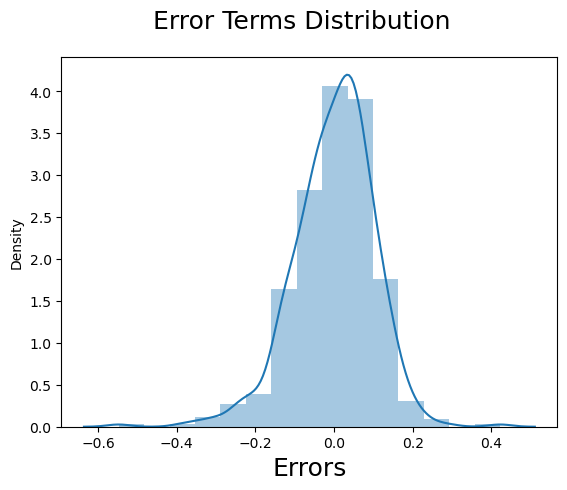

In [60]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 15)
fig.suptitle('Error Terms Distribution', fontsize = 18)     # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

Validation of assumption-1: We can see the values are normally distributed around the mean zero

#### - Assumption-2: Error terms are independent of each other

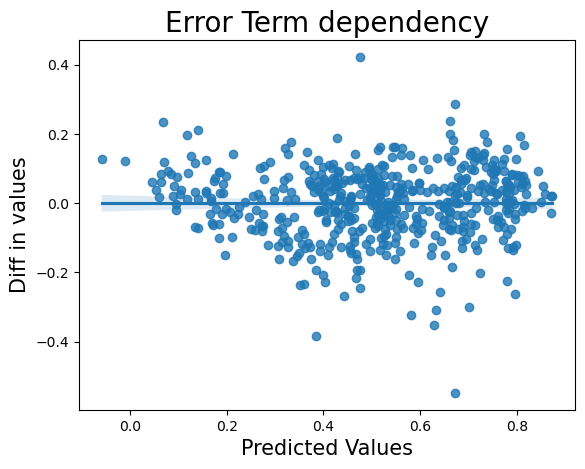

In [61]:
sns.regplot(x=y_train_cnt, y= y_train - y_train_cnt)
plt.title('Error Term dependency', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Diff in values', fontdict={'fontsize': 15})
plt.show()

Validation of assumption-2: We can see no relationship in the Predicted values and residuals

#### - Assumption-3: Error terms have constant variance (Homoscedasticity)

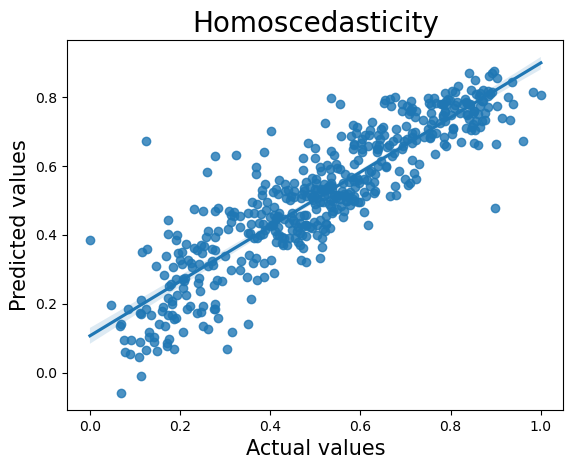

In [62]:
sns.regplot(x=y_train, y=y_train_cnt)
plt.title('Homoscedasticity', fontdict={'fontsize': 20})
plt.xlabel('Actual values', fontdict={'fontsize': 15})
plt.ylabel('Predicted values', fontdict={'fontsize': 15})
plt.show()

Validation of assumption-3: We can see that variance of the values are almost same across all the datapoints

# Step 8: Making Predictions on the Test dataset

Applying the scaling on the test sets

In [63]:
num_vars = ['temp', 'atemp', 'hum',	'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [64]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Satrd,Sunday,Thurs,Tues,Wedn,LightSnow_LightRain,Mist_Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X_test and y_test

In [65]:
y_test = df_test.pop('cnt')
X_test = df_test

In [66]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe5.columns]

# Adding a constant variable 
X_test_lm5 = sm.add_constant(X_test_new)

In [67]:
# Making predictions

y_pred = lm5.predict(X_test_lm5)

# Step 9: Model Evaluation 

Text(0, 0.5, 'y_pred')

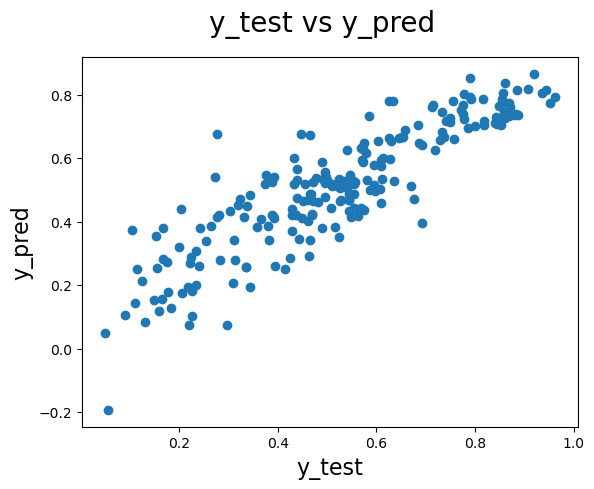

In [68]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=16)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# Step 10: Model Evaluation using r2_score

In [69]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.77720120918437

# THE END